In [21]:
import pandas as pd 
import regex as re
import matplotlib.pyplot as plt

In [3]:
url = "https://raw.githubusercontent.com/favstats/AllSideR/master/data/allsides_data.csv"
allsides = pd.read_csv(url)
allsides.head()

,news_source,rating,rating_num,type,agree,disagree,perc_agree,url,editorial_review,blind_survey,third_party_analysis,independent_research,confidence_level,twitter,wiki,facebook,screen_name
0,AARP,center,3.0,Think Tank / Policy Group,1404,2343,0.374700,https://www.allsides.com/news-source/aarp-medi...,0,0,0,0,NaN,https://twitter.com/AARP,https://en.wikipedia.org/wiki/AARP,NaN,AARP
1,ABC News,left-center,2.0,News Media,13793,9409,0.594475,https://www.allsides.com/news-source/abc-news-...,0,1,1,1,High,https://twitter.com/ABC,https://en.wikipedia.org/wiki/ABC_News,https://www.facebook.com/ABCNews/,ABC
2,Abridge News,allsides,NaN,News Media,31,17,0.645833,https://www.allsides.com/news-source/abridge-n...,0,0,0,1,High,https://twitter.com/Abridge_News,NaN,https://www.facebook.com/AbridgeNews,Abridge_News
3,Accuracy in Media,right,5.0,Think Tank / Policy Group,743,444,0.625948,https://www.allsides.com/news-source/accuracy-...,0,0,0,1,Medium,NaN,https://en.wikipedia.org/wiki/Accuracy_in_Media,NaN,NaN
4,ACLU,left-center,2.0,Think Tank / Policy Group,1272,1697,0.428427,https://www.allsides.com/news-source/american-...,0,0,0,0,NaN,https://twitter.com/@ACLU,https://en.wikipedia.org/wiki/American_Civil_L...,https://www.facebook.com/aclu/,ACLU


In [4]:
newsData = pd.read_csv("/shared/3/projects/newsDiffusion/data/processed/newsData/fullDataWithNERCleaned.tsv", sep="\t")

<ipython-input-4-2c6c3b6dc08c>:1: DtypeWarning: Columns (3,4,11,12,14,15,18) have mixed types. Specify dtype option on import or set low_memory=False.
  newsData = pd.read_csv("/shared/3/projects/newsDiffusion/data/processed/newsData/fullDataWithNERCleaned.tsv", sep="\t")


In [6]:
nationalOutlets = newsData.loc[newsData["national"] == True, "source"].unique()

In [7]:
#remove anything that isn't a number or letter 
def cleanStr(inStr): 
    inStr = inStr.lower()
    return re.sub("[^a-z0-9]", "", inStr)
    
allsides["sourceCleaned"] = allsides["news_source"].apply(cleanStr)

In [8]:
natDf = pd.DataFrame(nationalOutlets, columns=["sourceCleaned"])

In [11]:
matchedSources = pd.merge(natDf, allsides[["sourceCleaned", "news_source", "rating_num", "agree", "disagree"]], on="sourceCleaned", how="inner")

In [14]:
matchedSources["totalRatings"] = matchedSources["agree"] + matchedSources["disagree"]

(array([17.,  0., 16.,  0.,  0., 14.,  0.,  6.,  0., 11.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

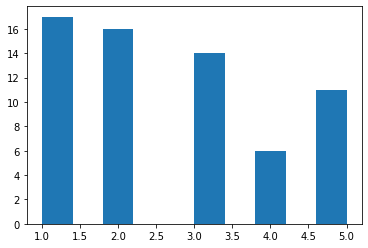

In [24]:
matchedSources.sort_values("totalRatings", ascending=False).head(30)
plt.hist(matchedSources["rating_num"])

In [40]:
matchedSources.to_csv("/shared/3/projects/newsDiffusion/data/processed/politicalSlant/national2020slant.csv")